<a href="https://colab.research.google.com/github/kumarlova/Cardiovascular-Risk-prediction-/blob/main/Copy_of_Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Description**
###*Demographic:*
###• Sex: male or female("M" or "F")
###• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
###Behavioral:
###• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
###• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history):
###• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
###• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
###• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
###• Diabetes: whether or not the patient had diabetes (Nominal)
### Medical(current):
###• Tot Chol: total cholesterol level (Continuous)
###• Sys BP: systolic blood pressure (Continuous)
###• Dia BP: diastolic blood pressure (Continuous)
###• BMI: Body Mass Index (Continuous)
###• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
###• Glucose: glucose level (Continuous)

###**Predict variable (desired target)**
###• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['figure.dpi'] = 100

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df1=df.copy

In [6]:
df.shape

(3390, 17)

In [7]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
numerical_columns=df.describe().columns
numerical_columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
categorical_columns=df.describe(include=['object','category']).columns
categorical_columns

Index(['sex', 'is_smoking'], dtype='object')

In [12]:
# Checking the number of unique values in each column
_dict_ = {}
for i in list(df.columns):
  _dict_.update({i:df[i].nunique()})
_dict_

{'BMI': 1259,
 'BPMeds': 2,
 'TenYearCHD': 2,
 'age': 39,
 'cigsPerDay': 32,
 'diaBP': 142,
 'diabetes': 2,
 'education': 4,
 'glucose': 132,
 'heartRate': 68,
 'id': 3390,
 'is_smoking': 2,
 'prevalentHyp': 2,
 'prevalentStroke': 2,
 'sex': 2,
 'sysBP': 226,
 'totChol': 240}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [14]:
df.fillna(0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [16]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df['age'].unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32])

In [18]:
TenYearCHD_count=df['TenYearCHD'].value_counts().to_frame().reset_index()
TenYearCHD_count.columns=['TenYearCHD','count']

In [19]:
TenYearCHD_count

,TenYearCHD,count
0,0,2879
1,1,511


In [23]:
age_aff =df[['age','TenYearCHD']].groupby('TenYearCHD').count().sort_values('age',ascending = True).reset_index()

In [24]:
age_aff

,TenYearCHD,age
0,1,511
1,0,2879


In [25]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
0.0      87
Name: education, dtype: int64

In [26]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [27]:
df['cigsPerDay'].value_counts()

0.0     1725
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [28]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [29]:
df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [30]:
df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [31]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [32]:
df['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
365.0     1
331.0     1
113.0     1
392.0     1
364.0     1
Name: totChol, Length: 241, dtype: int64

In [33]:
df['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

In [34]:
df['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

In [35]:
df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
0.00     14
23.48    12
         ..
39.04     1
26.66     1
29.55     1
35.58     1
31.09     1
Name: BMI, Length: 1260, dtype: int64

In [36]:
df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
0.0        1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 69, dtype: int64

In [37]:
df['glucose'].value_counts()

0.0      304
75.0     149
83.0     135
70.0     123
77.0     122
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 133, dtype: int64

In [38]:
df.groupby(['sex','age']).max()

id  education is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
sex age                                                                    
F   32   2642        2.0        YES        15.0     0.0                0   
    33    518        3.0        YES        15.0     0.0                0   
    34   3261        3.0        YES        20.0     0.0                0   
    35   3025        4.0        YES        30.0     0.0                0   
    36   3230        4.0        YES        25.0     0.0                0   
...       ...        ...        ...         ...     ...              ...   
M   65   3043        4.0        YES        25.0     1.0                1   
    66   3291        4.0        YES        30.0     0.0                0   
    67   3374        3.0        YES        60.0     1.0                0   
    68   3159        1.0        YES        15.0     0.0                0   
    69   1098        1.0        YES         4.0     0.0                0   

         prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
sex age                                                                    
F   32              0         0    242.0  111.0   70.0  29.84       80.0   
    33              0         0    200.0  119.0   81.0  23.80       75.0   
    34              0         0    227.0  121.0   86.0  25.67      100.0   
    35              0         0    248.0  150.0   90.0  27.86      110.0   
    36              1         1    295.0  156.5  105.0  33.82      102.0   
...               ...       ...      ...    ...    ...    ...        ...   
M   65              1         1    286.0  235.0  100.0  34.69       95.0   
    66              1         1    288.0  213.0  133.0  32.33      100.0   
    67              1         0    261.0  214.0  106.0  32.63       90.0   
    68              1         1    276.0  168.0   97.0  33.52      110.0   
    69              1         0    245.0  151.0   77.0  26.58       75.0   

         glucose  TenYearCHD  
sex age                       
F   32      88.0           0  
    33      93.0           0  
    34      88.0           0  
    35      90.0           1  
    36     186.0           1  
...          ...         ...  
M   65     297.0           1  
    66     216.0           1  
    67     103.0           1  
    68     148.0           1  
    69      81.0           1  

[76 rows x 15 columns]

In [39]:
df.groupby(['education', 'cigsPerDay']).size().groupby(level=1).max()

cigsPerDay
0.0     746
1.0      18
2.0       7
3.0      29
4.0       3
5.0      39
6.0       7
7.0       4
8.0       4
9.0      37
10.0     37
11.0      2
12.0      1
13.0      2
14.0      1
15.0     65
16.0      1
17.0      2
18.0      3
19.0      1
20.0    245
23.0      4
25.0     13
30.0     69
35.0      7
38.0      1
40.0     26
43.0     20
45.0      1
50.0      3
60.0      3
70.0      1
dtype: int64

In [40]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.0,90.0,80.0,1


##**Exeploratory data Analysis**

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

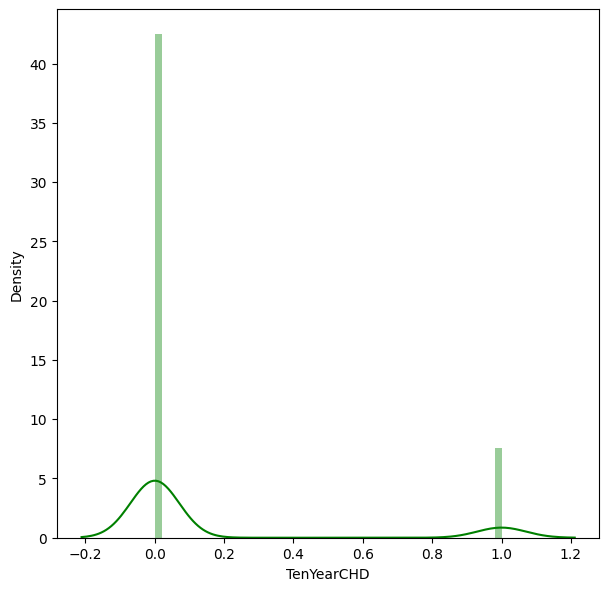

In [42]:
# Dependent variable 'TenYearCHD'
plt.figure(figsize=(7,7))
sns.distplot(df['TenYearCHD'],color="g")

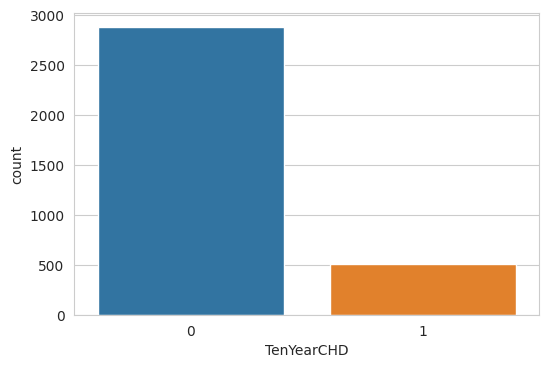

In [90]:
sns.countplot(x=df['TenYearCHD'])

In [43]:
numerical_columns=df.describe().columns
numerical_columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

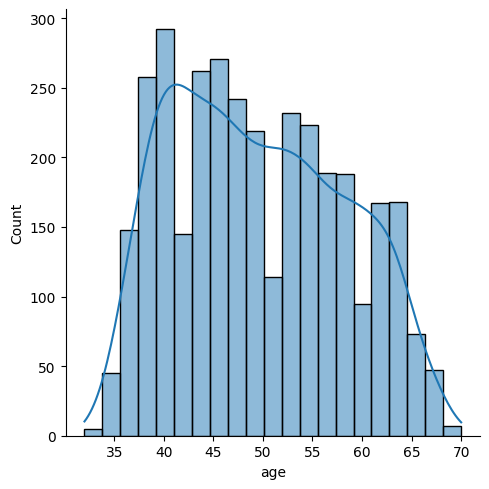

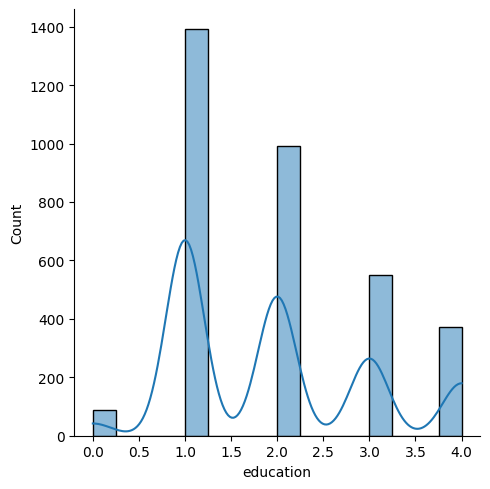

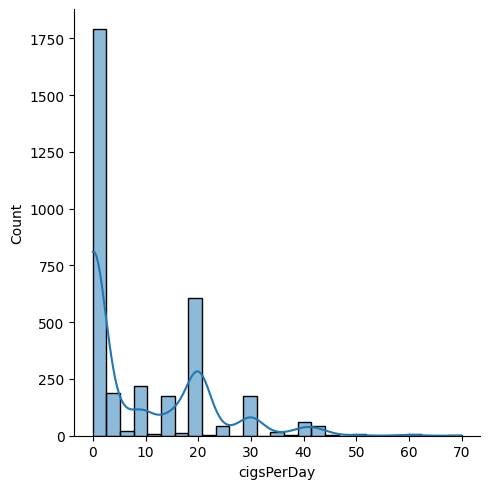

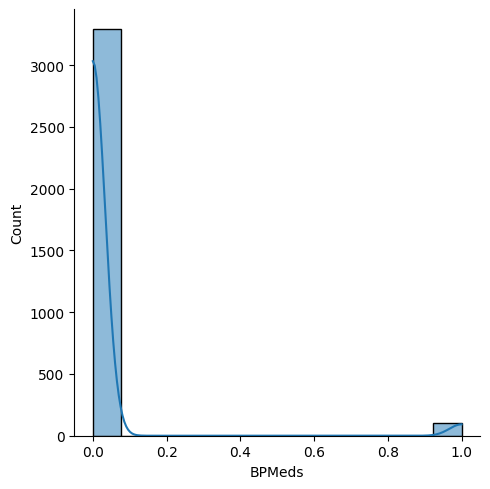

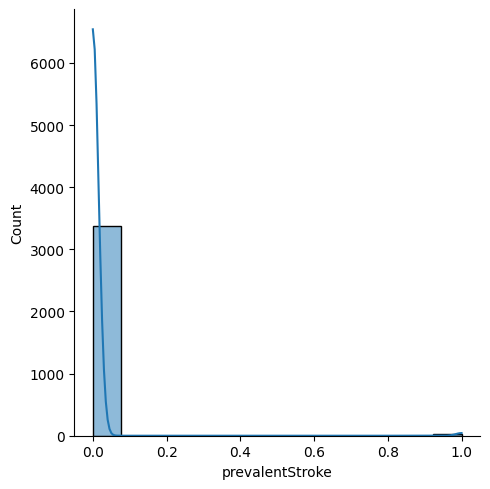

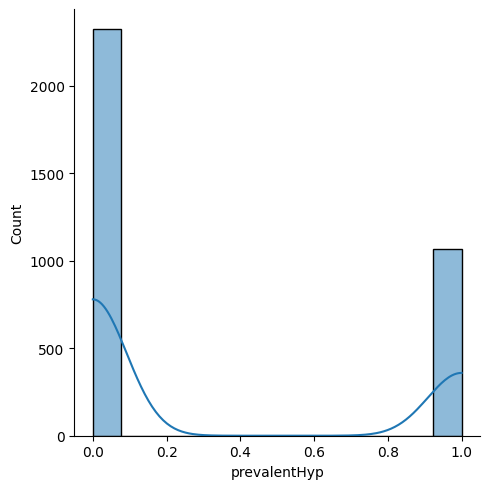

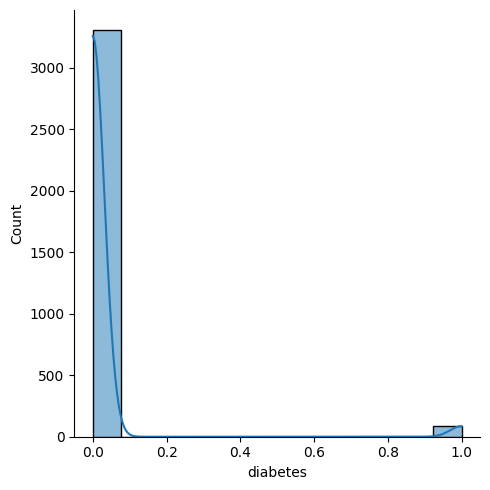

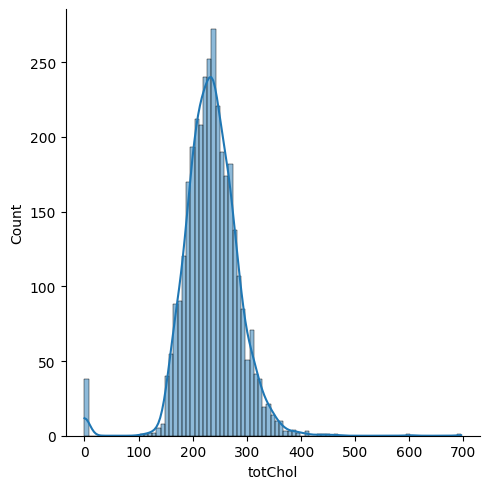

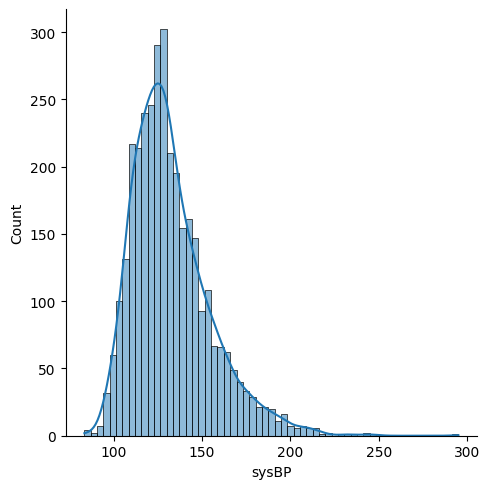

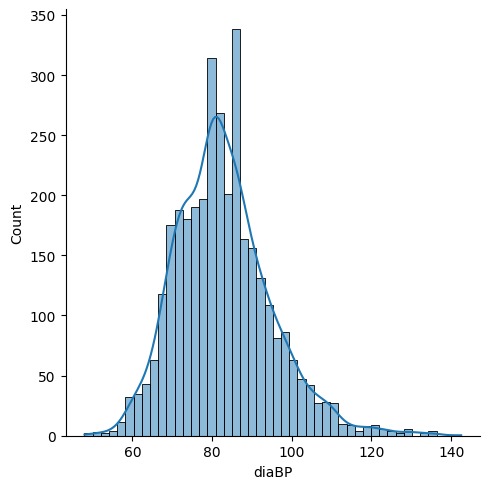

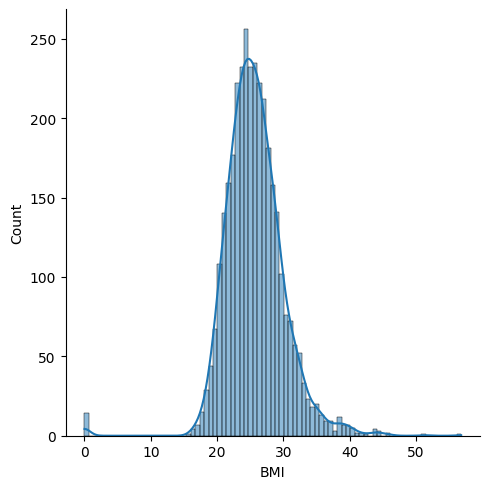

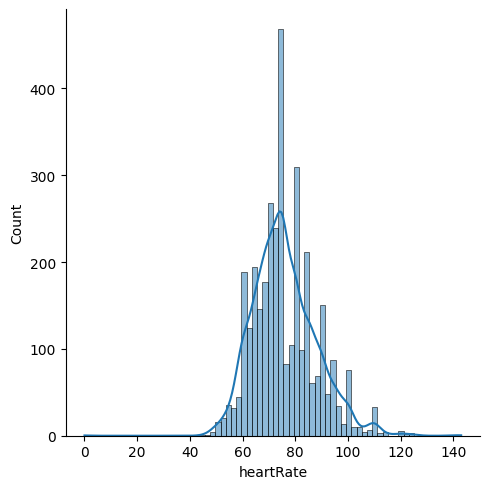

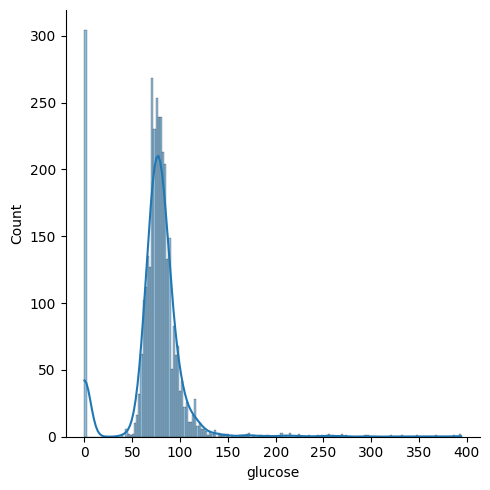

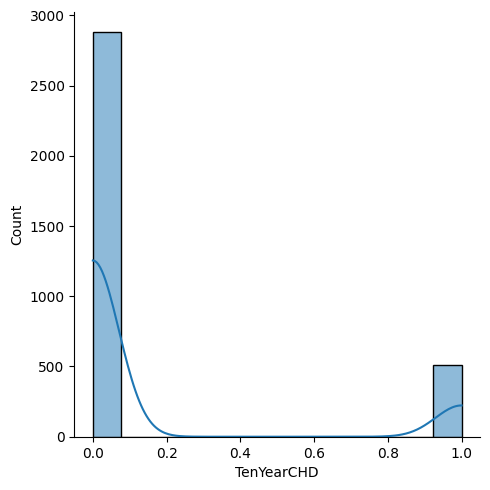

In [44]:
plt.figure(figsize=(8,6))
lis=['age','education',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']

for i in lis:
  sns.displot(df[i],kde=True)

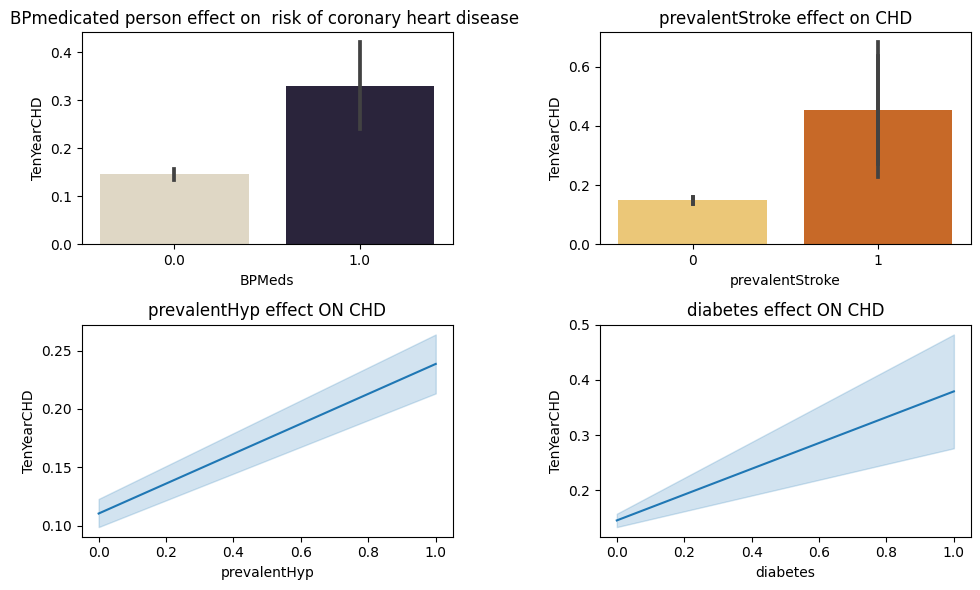

In [45]:
x = [['BPMeds', 'prevalentStroke'], ['prevalentHyp', 'diabetes']]
title = [['BPmedicated person effect on  risk of coronary heart disease ', 'prevalentStroke effect on CHD'], 
         ['prevalentHyp effect ON CHD', 'diabetes effect ON CHD']]

f, ax = plt.subplots(2,2,figsize=(10,6))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='TenYearCHD', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='TenYearCHD', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='TenYearCHD', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

In [46]:
Medical_current= ['totChol','sysBP','diaBP','BMI','heartRate','glucose']

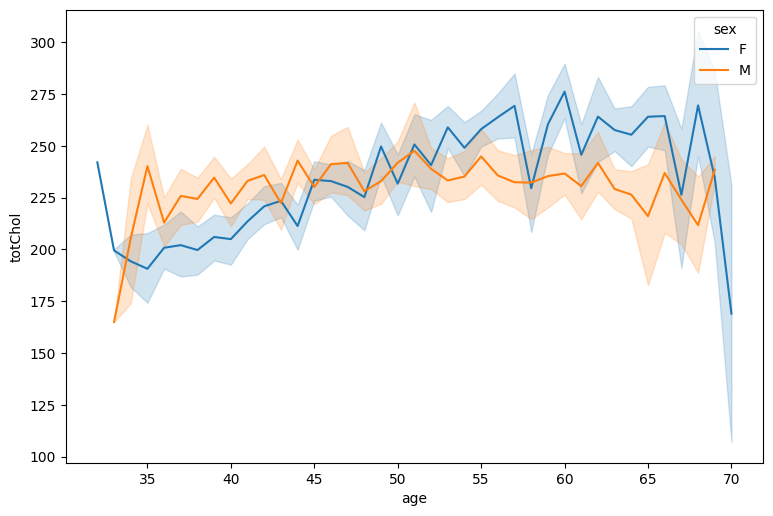

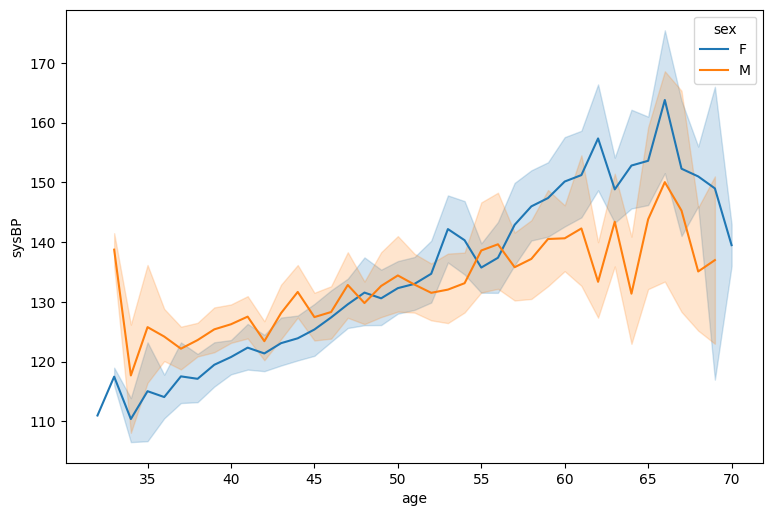

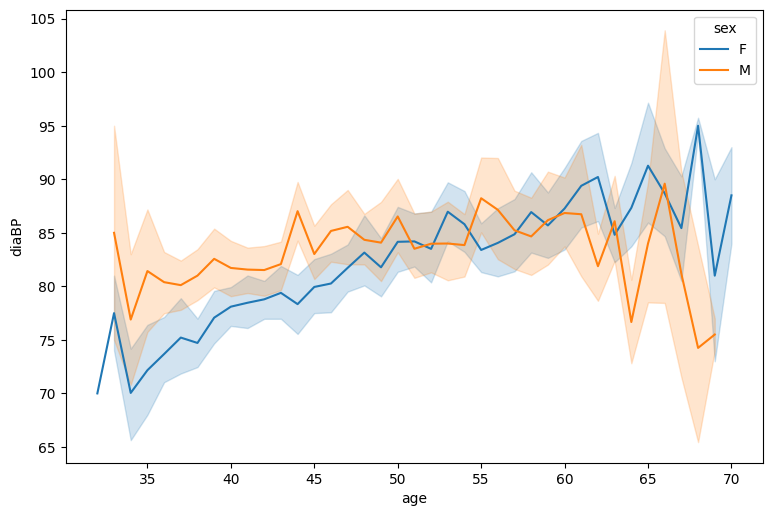

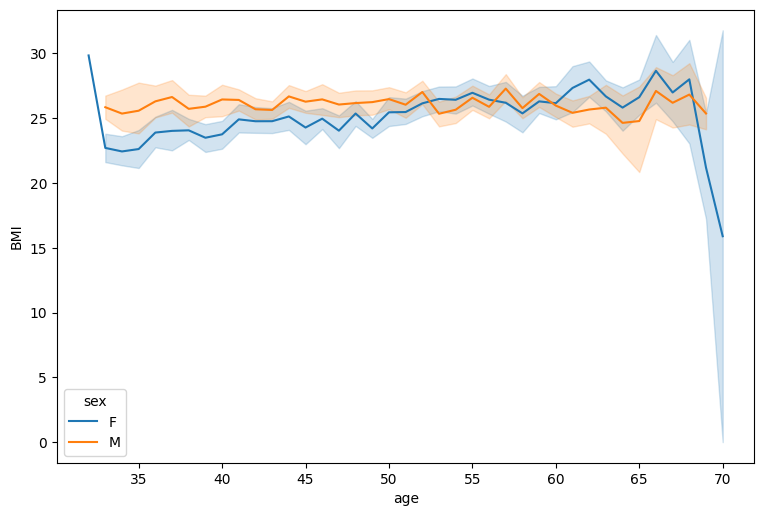

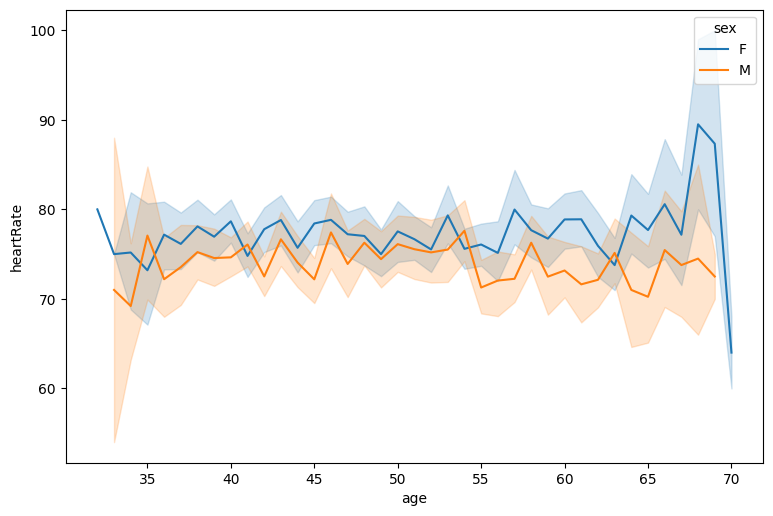

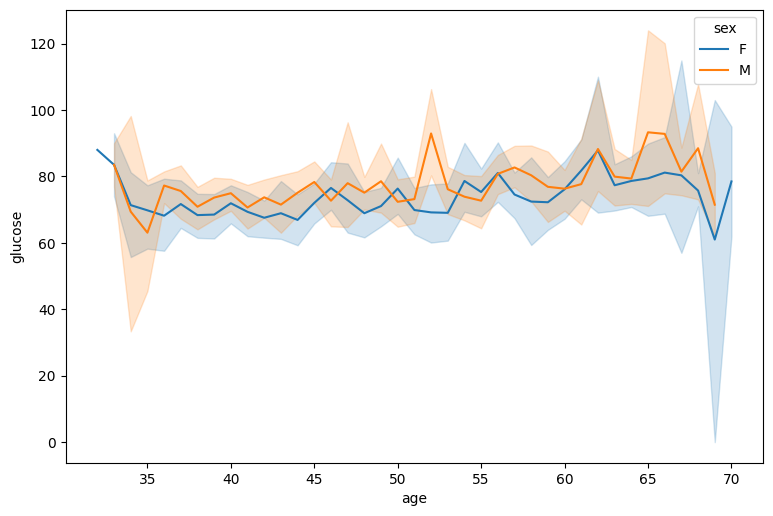

In [47]:
for i in Medical_current[:6]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.lineplot(data = df, x = 'age',y = i , hue = 'sex')

In [48]:
categorical_columns=df.describe(include=['object','category']).columns
categorical_columns

Index(['sex', 'is_smoking'], dtype='object')

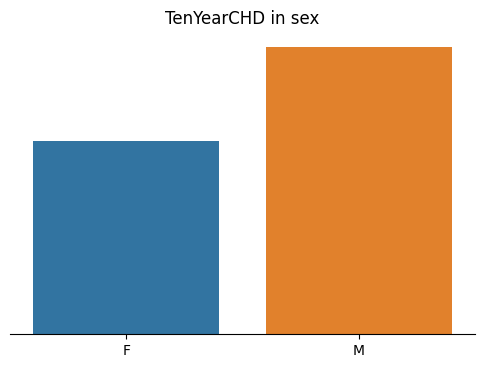

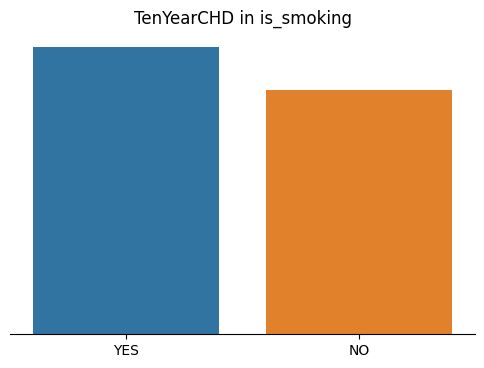

In [49]:
for i in categorical_columns[:]:  
  fig = plt.figure(figsize = (6,4))
  ax = fig.gca()
  
  if df[i].nunique() < 5:      #.... ensuring categorical variable with not more than 5 unique values are considerd
    sns.barplot(data = df, x = df[i], y = 'TenYearCHD',ci = None, ax = ax)  # ... Creating the bargrahph 
    plt.title('TenYearCHD in ' + i)
    plt.xlabel('')
    plt.ylabel('')
    ax.set_yticks([])
    sns.despine(left = True)

In [50]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.0,90.0,80.0,1


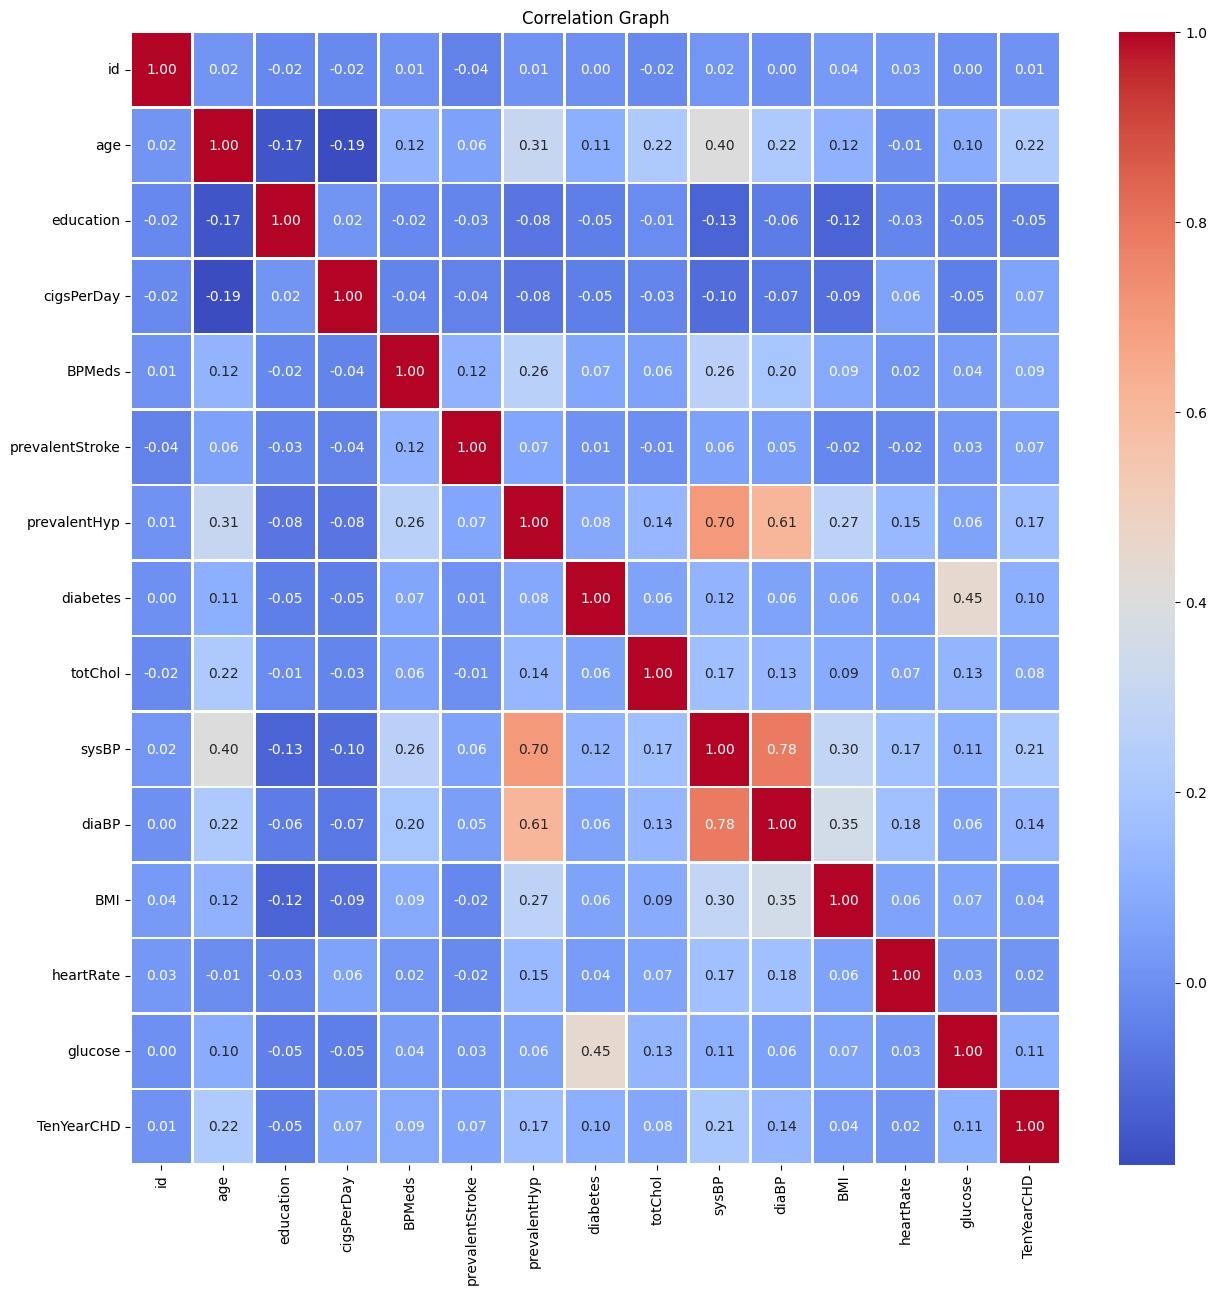

In [51]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

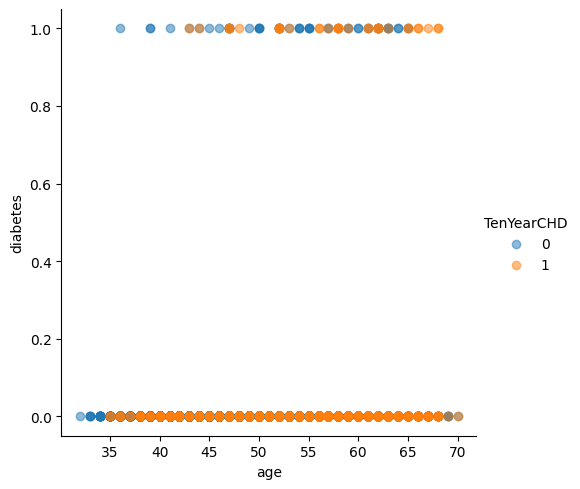

In [55]:
sns.lmplot(x='age', y='diabetes', hue='TenYearCHD', data=df, fit_reg=False, scatter_kws={'alpha':0.5});

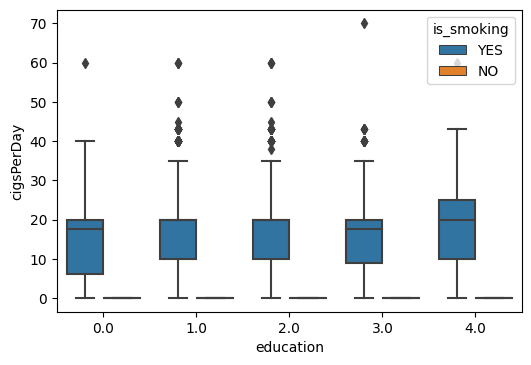

In [57]:
sns.boxplot(x ='education', y ='cigsPerDay', data = df, hue ='is_smoking')

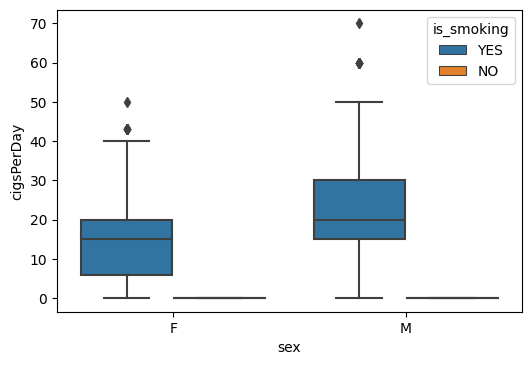

In [58]:
sns.boxplot(x ='sex', y ='cigsPerDay', data = df, hue ='is_smoking')

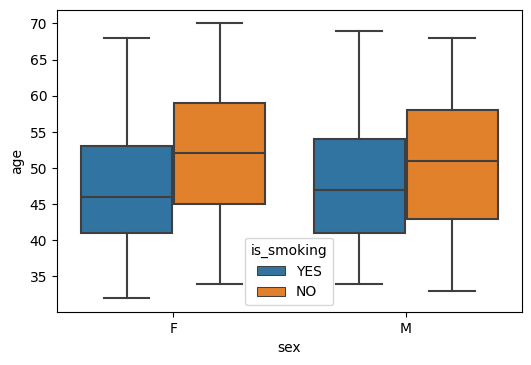

In [60]:
sns.boxplot(x ='sex', y ='age', data = df, hue ='is_smoking')

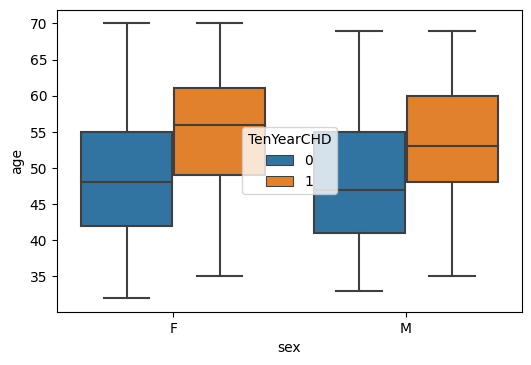

In [68]:
sns.boxplot(x ='sex', y ='age', data = df, hue ='TenYearCHD')

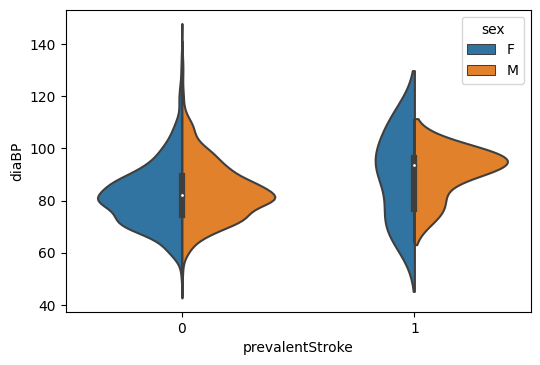

In [64]:
sns.violinplot(x ='prevalentStroke', y ='diaBP', data = df, hue ='sex', split = True)

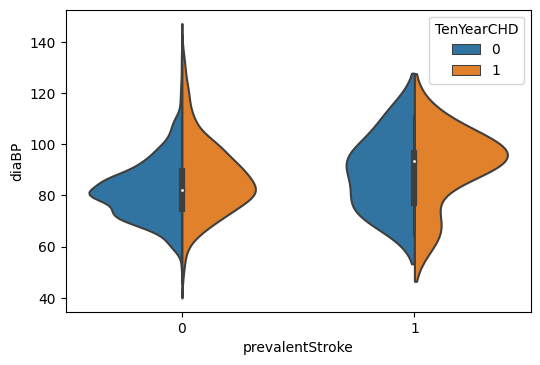

In [65]:
sns.violinplot(x ='prevalentStroke', y ='diaBP', data = df, hue ='TenYearCHD', split = True)

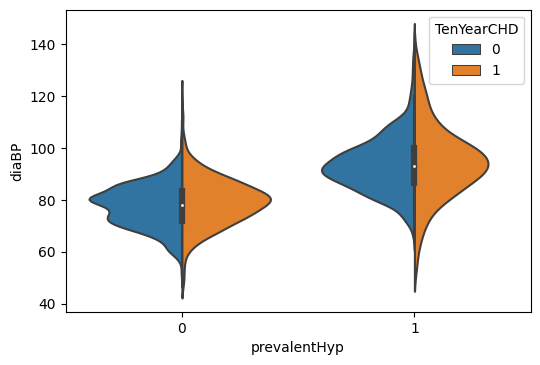

In [66]:
sns.violinplot(x ='prevalentHyp', y ='diaBP', data = df, hue ='TenYearCHD', split = True)

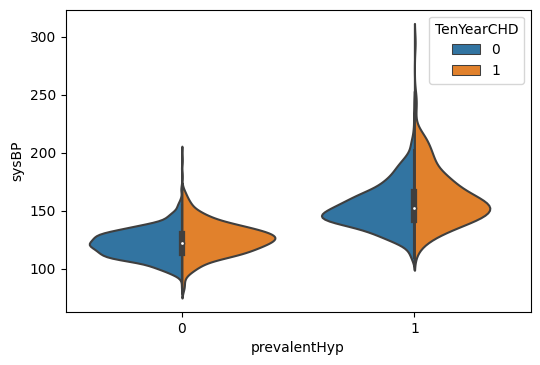

In [67]:
sns.violinplot(x ='prevalentHyp', y ='sysBP', data = df, hue ='TenYearCHD', split = True)

In [69]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.0,90.0,80.0,1


In [83]:
continuous=df[['cigsPerDay','sysBP','diaBP','heartRate','glucose']]

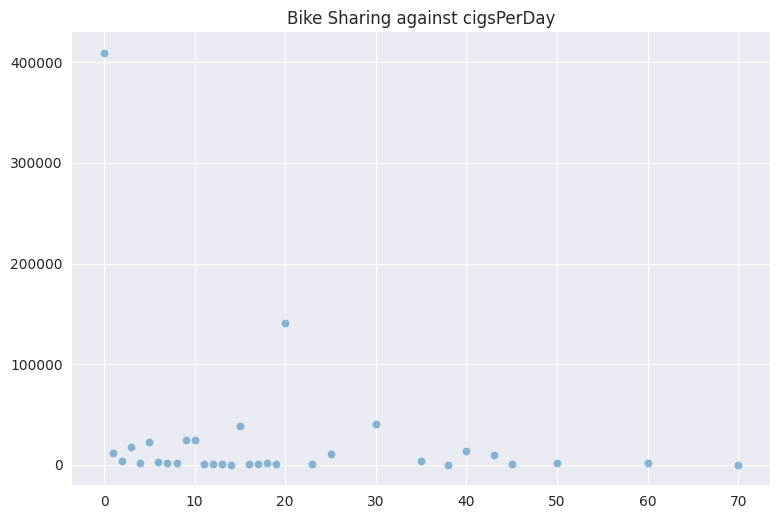

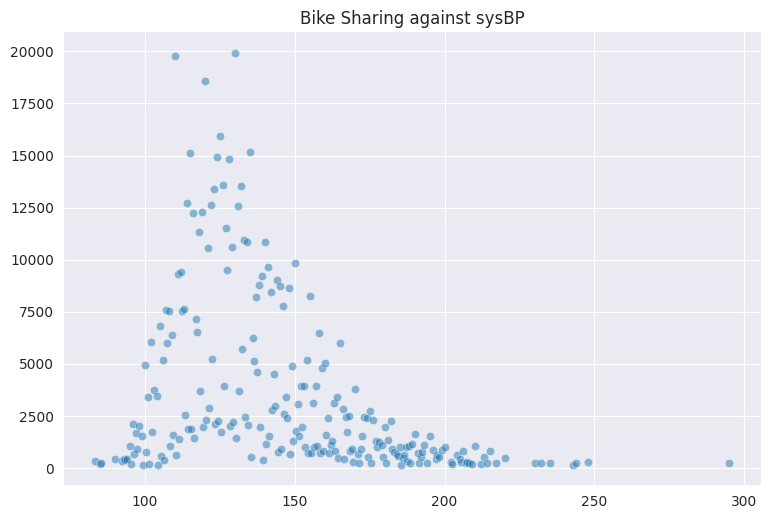

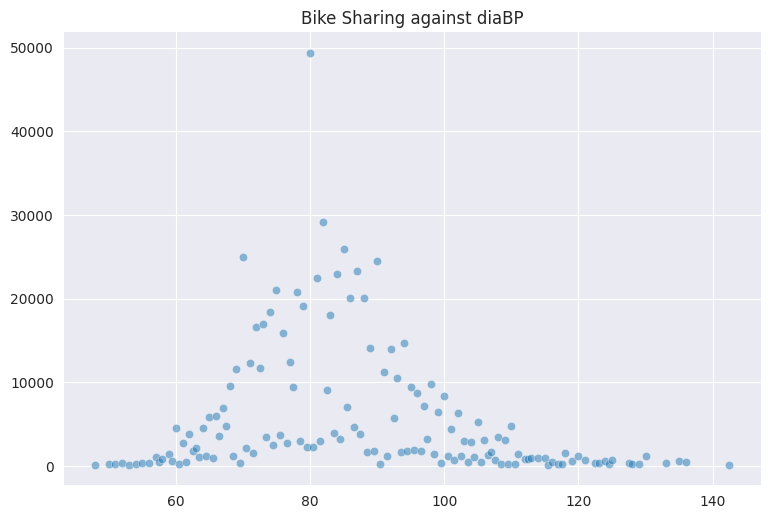

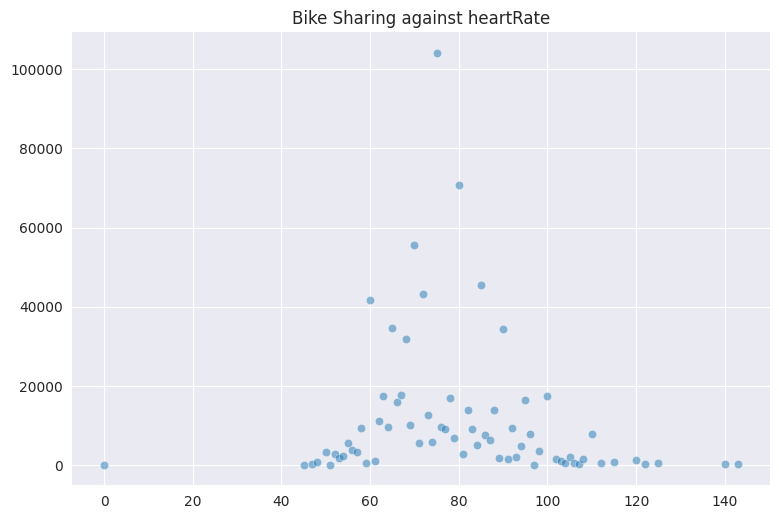

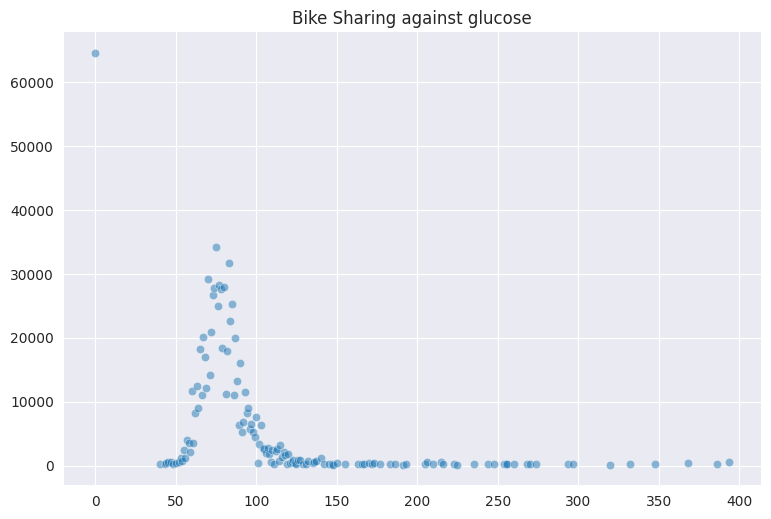

In [91]:
for i in continuous:   #....exlcuding the bike rented count from for loop
  sns.set_style('darkgrid')        # ... setting up the background for the plot 
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()

  if df[i].nunique() < 25:       #... Creating line plot for varible with less than 25 unique values
    sns.lineplot(data = df.groupby([i]).sum().reset_index().iloc[:,:], x = i ,  y = 'totChol',marker = "r", ax = ax)
    
  else:                          #... Creating scatterplot for variable with more than 25 unique values
    sns.scatterplot(data = df.groupby([i]).sum().reset_index().iloc[:,:], x = i ,  y = 'totChol',ax =ax, alpha = 0.5)  
    
  plt.xlabel('')
  plt.ylabel('')
  ax.set_title(f'Bike Sharing against {i}')
  sns.despine(left = True, bottom =True)

In [92]:
df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,0.0,90.0,80.0,1


In [95]:
df = pd.get_dummies(df, columns = ['sex',	'is_smoking'])
df.tail()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
3385,3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0,1,0
3386,3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0,1,0
3387,3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1,0,1
3388,3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,0,1,1,0
3389,3389,54,3.0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0,1,0,1,0


In [106]:
data=df.set_index(['TenYearCHD'])
data

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES
TenYearCHD,,,,,,,,,,,,,,,,,,
1,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1,0,0,1
0,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,1,0
0,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,0,1
1,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,0,1,0,1
0,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,1,0,1,0
0,3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,1,0,1,0
1,3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,0,1,0,1


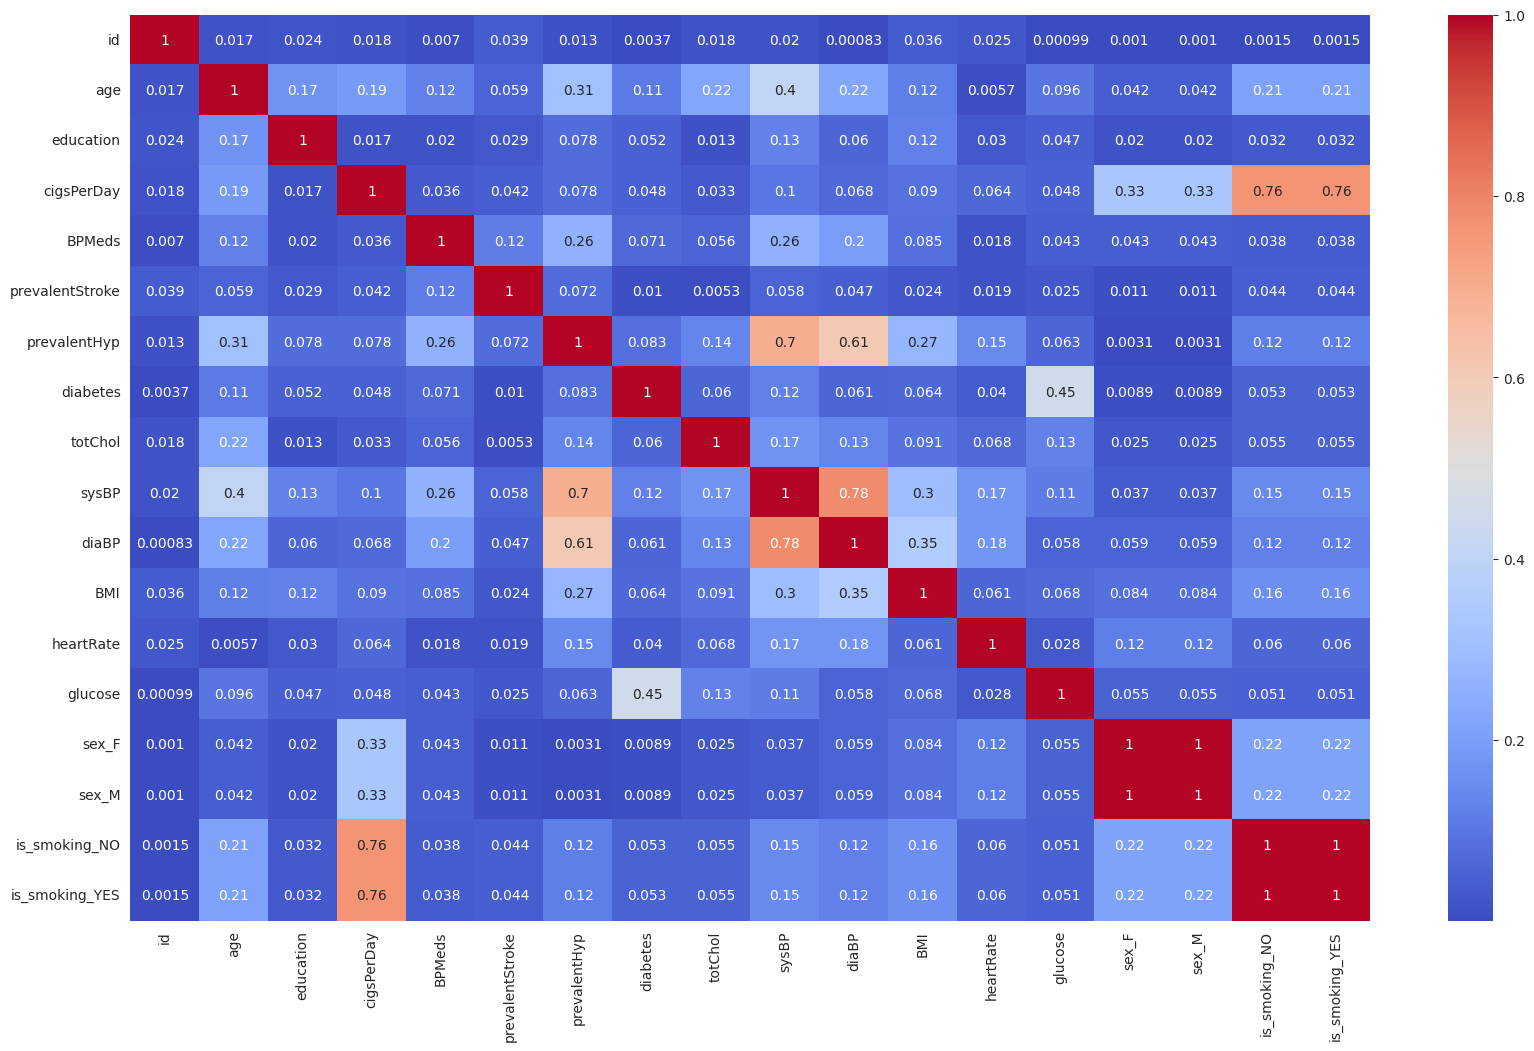

In [107]:
plt.figure(figsize=(20,12))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [109]:
data.drop(['sex_F','sex_M','is_smoking_NO','is_smoking_YES'],axis=1,inplace=True)

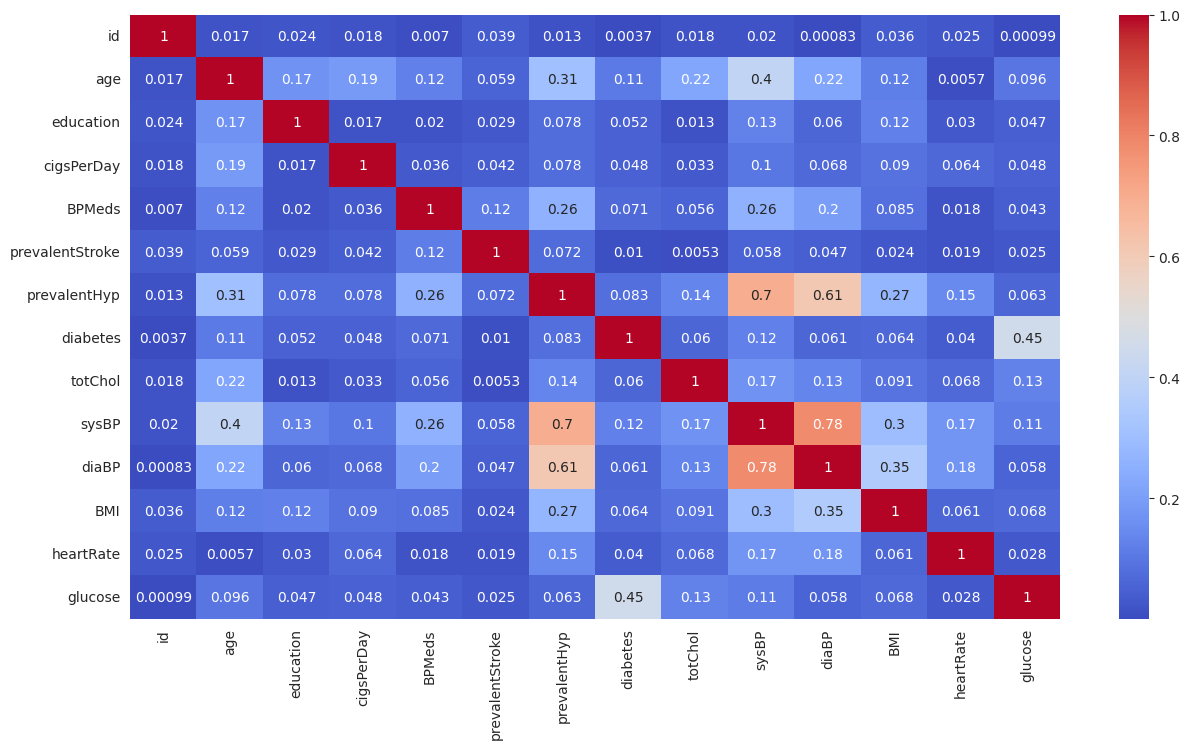

In [111]:
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [112]:
data

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
1,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0
0,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
0,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
1,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
0,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0
0,3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0
1,3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0


In [113]:
X = df.iloc[:,1:]
y = df['TenYearCHD'].copy()

In [114]:
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1,1,0,0,1
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0,1,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0,1,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1,0,1
3388,60,1.0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,0,1,1,0


In [115]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2712, 18)
(678, 18)


##**Logistic regression**

In [175]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=20)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=20)

In [176]:
clf.coef_

array([[ 0.02027548, -0.00671325,  0.0283197 ,  0.00046201,  0.00037649,
         0.00394778,  0.00074058, -0.00233529,  0.02822817, -0.03215528,
        -0.03607876, -0.04186475,  0.00614792,  0.02446424, -0.00343662,
         0.00151146, -0.00181915, -0.00010602]])

In [177]:
clf.intercept_

array([-0.00192521])

In [178]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [179]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_train, y_train)
print(accur)

0.8517699115044248


In [180]:
accur1=metrics.accuracy_score(y_pred, y_test)

In [181]:
print(accur1)

0.8525073746312685


In [182]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [183]:
test_preds

array([[0.69409851, 0.30590149],
       [0.7099213 , 0.2900787 ],
       [0.92086052, 0.07913948],
       ...,
       [0.9397319 , 0.0602681 ],
       [0.87769261, 0.12230739],
       [0.86269629, 0.13730371]])

In [184]:
train_preds

array([[0.86572851, 0.13427149],
       [0.88110514, 0.11889486],
       [0.51338085, 0.48661915],
       ...,
       [0.83510579, 0.16489421],
       [0.87806489, 0.12193511],
       [0.82861653, 0.17138347]])

In [185]:
metrics.confusion_matrix(y_pred_train, y_train)

array([[2292,  389],
       [  13,   18]])

In [186]:
metrics.confusion_matrix(y_pred, y_test)

array([[573,  99],
       [  1,   5]])

From the confusion matrix we can say that :

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

In this case of our  data, the model correctly predicts 573 cases as people who not CHD and predicted as not CHD and 5 cases as people who CHD and our model also predicted as CHD.
In contrast, it mispredicts a total of 100 cases.

In [187]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       672
           1       0.05      0.83      0.09         6

    accuracy                           0.85       678
   macro avg       0.52      0.84      0.51       678
weighted avg       0.99      0.85      0.91       678



In [188]:
metrics.roc_auc_score(y_train, train_preds[:,1])

0.6570994579671369

In [189]:
metrics.roc_auc_score(y_test, test_preds[:,1])

0.578715491825248

In [190]:
from sklearn.metrics import log_loss
log_loss(y_test,test_preds[:,1])

0.4287384325108573

A good and model should have a smaller log loss value.

In [191]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [192]:
logistic = LogisticRegression()

In [193]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.998, test=0.998) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.994, test=0.989) total time=   0.2s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=1.000, test=1.000) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] END ................ accuracy: (train=1.000, test=0.998) total time=   0.2s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.995, test=0.994) total time=   0.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [194]:
scores['train_accuracy']

array([0.99769479, 0.99400645, 0.99953917, 0.99953917, 0.99493088])

In [195]:
scores['test_accuracy']

array([0.99815838, 0.98895028, 1.        , 0.99815498, 0.99446494])

In [196]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [197]:
for model in scores['estimator']:
    print(model.coef_)

[[-9.03579889e-03 -1.83771991e+00 -1.28154080e-03  1.10171275e-01
   1.60561737e-01  1.27469347e+00  1.73832936e-01  6.65529977e-04
  -1.38056700e-03 -2.56722684e-03 -3.46167928e-02  2.66508290e-03
   3.36864784e-04  9.44557874e+00 -1.02218913e+00  4.26837780e-01
  -2.93618950e-01 -3.01732402e-01]]
[[ 3.42106928e-02 -1.99216334e+00 -2.90767509e-03  6.91352690e-02
   1.04296981e-01  1.21965614e+00  2.94495461e-01  4.54552217e-03
  -1.03755005e-02  1.99245960e-02 -6.08962523e-02 -2.72879920e-02
  -1.14265276e-02  9.86249933e+00 -1.27496645e+00  6.50725064e-01
  -7.18099141e-02 -5.52431476e-01]]
[[-2.38431487e-02 -9.89955204e-01 -1.65677281e-02  9.49607805e-02
   1.27417646e-01  9.82838763e-01  1.76848781e-01  9.57558909e-04
  -7.47916388e-03 -2.05654248e-02  2.74971025e-02 -2.96580136e-03
   7.50688996e-03  8.94480631e+00 -1.04597801e+00  5.35892111e-01
  -2.86047229e-01 -2.24038670e-01]]
[[ 8.16906192e-03 -1.59911720e+00 -8.80574954e-03  1.55653772e-01
   1.74223736e-01  1.34245977e+00 

In [198]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998328 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.998132 (0.002581) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.998328 (0.002244) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.998328 (0.002370) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.992035 (0.008920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924090 (0.011448) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
